パーティクルフィルタによる位置予測（仲町二丁目_渋滞）

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def motion_model(particles, velocity, std):
    """
    モーションモデル：各パーティクルに速度を加え、ノイズを加える
    """
    particles += velocity + (np.random.randn(len(particles)) * std)
    return particles

def measurement_model(particles, measurement, std):
    """
    観測モデル：各パーティクルに対する観測値の尤度を計算する
    """
    likelihood = (1.0 / np.sqrt(2 * np.pi * std ** 2)) * np.exp(-0.5 * ((measurement - particles) / std) ** 2)
    return likelihood

def resample(particles, weights):
    """
    リサンプリング：重みに基づいてパーティクルをリサンプリングする
    """
    indices = np.random.choice(range(len(particles)), size=len(particles), replace=True, p=weights)
    particles = particles[indices]
    weights = np.ones_like(weights) / len(particles)  # 重みを均一化
    return particles, weights

# 初期設定
num_particles = 100
initial_position = 0
initial_velocity = 1
motion_std = 0.1
measurement_std = 0.5
true_position = 10

# 初期化
particles = np.random.normal(loc=initial_position, scale=1, size=num_particles)
velocity = initial_velocity
weights = np.ones(num_particles) / num_particles

# フィルタリング
for t in range(50):
    # モーション予測
    particles = motion_model(particles, velocity, motion_std)
    
    # メッシュメント更新
    measurement = true_position + np.random.randn() * measurement_std
    weights *= measurement_model(particles, measurement, measurement_std)
    
    # リサンプリング
    if np.sum(weights) < num_particles / 2:
        particles, weights = resample(particles, weights)
    
    # 推定値の表示
    estimated_position = np.mean(particles)
    print("Step {}: Estimated Position = {:.2f}".format(t+1, estimated_position))

# 結果のプロット
plt.hist(particles, bins=30, density=True, color='blue', alpha=0.5, label='Particles')
plt.axvline(x=true_position, color='red', linestyle='--', label='True Position')
plt.xlabel('Position')
plt.ylabel('Probability Density')
plt.title('Particle Filter')
plt.legend()
plt.grid(True)
plt.show()


ValueError: probabilities do not sum to 1

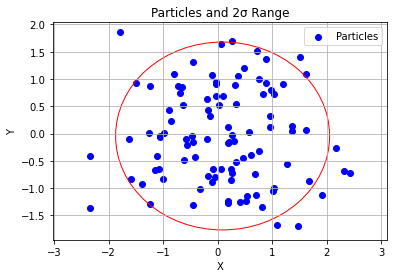

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# 100個のランダムなパーティクルを生成
particles = np.random.normal(loc=0, scale=1, size=(100, 2))

# パーティクルの分散を計算
variance = np.var(particles, axis=0)

# 2σの範囲を計算
two_sigma_range = 2 * np.sqrt(variance)

# プロット
fig, ax = plt.subplots()
ax.scatter(particles[:, 0], particles[:, 1], color='blue', label='Particles')

# 2σの範囲を描画
mean = np.mean(particles, axis=0)
ellipse = Ellipse(xy=mean, width=two_sigma_range[0]*2, height=two_sigma_range[1]*2, angle=0, edgecolor='red', facecolor='none')
ax.add_patch(ellipse)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Particles and 2σ Range')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


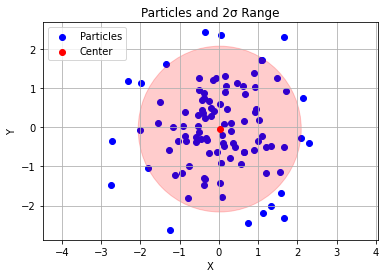

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# 100個のランダムなパーティクルを生成
particles = np.random.normal(loc=0, scale=1, size=(100, 2))

# パーティクルの分散を計算
variance = np.var(particles, axis=0)

# 2σの範囲を計算
two_sigma_range = 2 * np.sqrt(variance)

# プロット
fig, ax = plt.subplots()
ax.scatter(particles[:, 0], particles[:, 1], color='blue', label='Particles')

# 2σの範囲を描画
mean = np.mean(particles, axis=0)
ellipse = Ellipse(xy=mean, width=two_sigma_range[0]*2, height=two_sigma_range[1]*2, angle=0, edgecolor='red', facecolor='red', alpha=0.2)
ax.add_patch(ellipse)

# 楕円の中心を濃くする
ax.scatter(mean[0], mean[1], color='red', label='Center', zorder=5)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Particles and 2σ Range')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


In [3]:
# 動画からフレームを保存
import cv2

# 動画ファイル名
video_file = '/Users/meguro/Documents/谷口研/学部4年/データセット/実験用データ/仲町二丁目/仲町二丁目_渋滞.mov'

# 動画の読み込み
cap = cv2.VideoCapture(video_file)

# フレーム数の初期化
frame_count = 0

# メインループ
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_name = '/Users/meguro/Documents/谷口研/修士卒研/パーティクルフィルタ/data/仲町二丁目/frame/' + str(frame_count) + '.jpg'
    
    # 差分画像をファイルで保存
    cv2.imwrite(frame_name, frame)

    # フレーム数をカウント
    frame_count += 1

# 後処理
cap.release()